In [108]:
def compute_cost(X, y, theta, lambda_reg):
    m = y.size
    h = X.dot(theta)
    J = 1 / (2 * m) * (h - y).T.dot(h - y) + lambda_reg / (2 * m) * np.sum(np.square(theta[1:]))
    return J

def gradient_descent(X, y, theta, alpha, num_iters, lambda_reg):
    m = y.size
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        h = X.dot(theta)
        theta -= alpha * (1 / m * (X.T.dot(h - y)) + lambda_reg / m * np.concatenate(([0], theta[1:])))
        J_history[i] = compute_cost(X, y, theta, lambda_reg)

    return theta, J_history

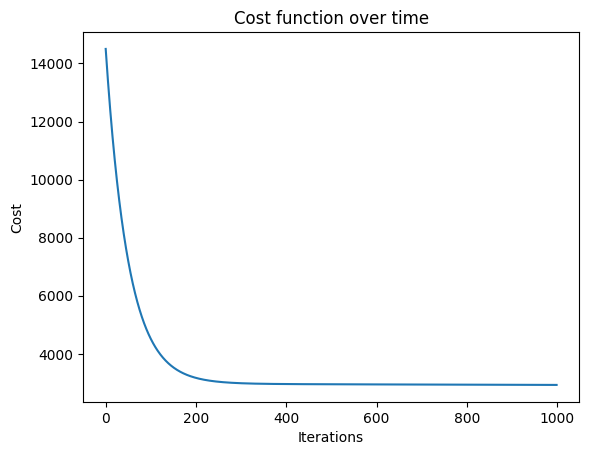

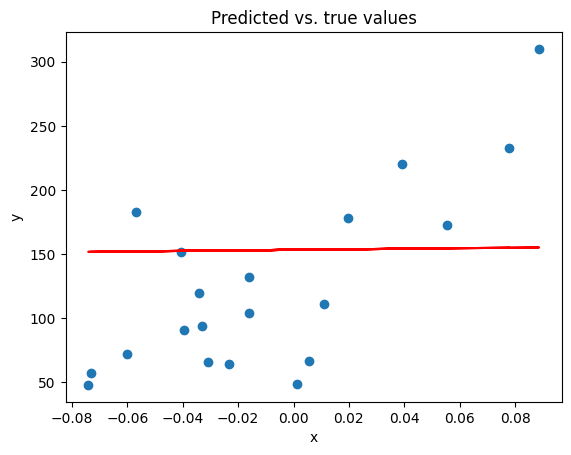

Final cost: 2930.1024713063534
Predicted y for x=5: 258.62412538836725


In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import *
from sklearn.metrics import classification_report, confusion_matrix

diabetes_X,diabetes_y = load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:,np.newaxis,2]

# Add bias term to feature matrix
X = np.concatenate((np.ones((len(diabetes_X), 1)), diabetes_X), axis=1)

X_train = X[:-20]
X_test = X[-20:]
y_train = diabetes_y[:-20]
y_test = diabetes_y[-20:]

# Set hyperparameters
alpha = 0.01
num_iters = 1000
lambda_reg = 0.1

# Initialize weights
theta = np.zeros(2)

# Run gradient descent
theta, J_history = gradient_descent(X_train, y_train, theta, alpha, num_iters, lambda_reg)

# Plot the cost function
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function over time')
plt.show()

# Make predictions and plot them against the true values
y_pred = X_test.dot(theta)
plt.scatter(X_test[:, 1], y_test)
plt.plot(X_test[:, 1], y_pred, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predicted vs. true values')
plt.show()

# Print the final cost and the predicted y values for x=5
print('Final cost:', J_history[-1])
print('Predicted y for x=5:', np.array([1, 5]).dot(theta))
